In [ ]:
# we are working on a Airbnb data 

In [3]:
# first we import a library to perform on data 

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [86]:
df = pd.read_csv('Airbnb_Open_Data.csv')

C:\Users\jauwa\AppData\Local\Temp\ipykernel_14708\2167922700.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Airbnb_Open_Data.csv')


In [87]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [8]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

# Now we start checking Missing values

In [88]:
df.isnull().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102349 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102193 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [12]:
# Now we cheking which column are using aur not and if some column are not using or not
# nessary to helping the perform data then first remove a Column.

In [13]:
# hum isse phle yeah dekhnge ki hume konsa column cahhea aur konsa nhi cahhea jo bhi 
# column hamare kaam ka nhi hai usko hum hata denge (Remove) aur jo kaam ka hai uske null
# Value pai perform krenghe 

# handling Missing value

In [14]:
# now we checking we a column data type and if some column have not data type are correct 
# first we correct it data type

In [89]:
df['last review'] = pd.to_datetime(df['last review'], errors = 'coerce')

In [16]:
# we use errors ='coerce' iska mtlv hota hai ki yaha pai missing vlaue ho yeah uski 
# jagah NaN fill krde meaning (Not a Number) isse humko easy hoga data pai performing krne le liyea

In [17]:
# Now we fill something in missing vlaue in columns

In [90]:
df.fillna({'reviews per month' : 0, 'last review' : df['last review'].min()}, inplace=True)

In [91]:
df.isnull().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                            0
reviews per month                      0
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

In [21]:
# Now we drop a missing value in least number of missing value in column
# hum usme se missing value ko hatayenge jisme se missing value kam ho

In [92]:
df.dropna(subset = ['NAME', 'host name'], inplace=True)

In [27]:
# now we delete a column thats does not need to a column

In [93]:
df = df.drop(columns=['license', 'house_rules'], errors='ignore')

In [30]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020.0,$966,$193,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007.0,$142,$28,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,2005.0,$620,$124,3.0,0.0,2012-07-11,0.00,5.0,1.0,352.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,2009.0,$204,$41,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,2013.0,$577,$115,3.0,74.0,2019-06-22,0.59,3.0,1.0,374.0


In [94]:
# remove dollar signs and convert to float
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
df['service fee'] = df['service fee'].replace('[\$,]', '', regex=True).astype(float)

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
C:\Users\jauwa\AppData\Local\Temp\ipykernel_14708\1609786821.py:2: SyntaxWarning: invalid escape sequence '\$'
  df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
C:\Users\jauwa\AppData\Local\Temp\ipykernel_14708\1609786821.py:3: SyntaxWarning: invalid escape sequence '\$'
  df['service fee'] = df['service fee'].replace('[\$,]', '', regex=True).astype(float)


In [95]:
df.head(5)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020.0,966.0,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007.0,142.0,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,2005.0,620.0,124.0,3.0,0.0,2012-07-11,0.00,5.0,1.0,352.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,2009.0,204.0,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,2013.0,577.0,115.0,3.0,74.0,2019-06-22,0.59,3.0,1.0,374.0


In [96]:
df.isnull().sum()

id                                  0
NAME                                0
host id                             0
host_identity_verified            276
host name                           0
neighbourhood group                26
neighbourhood                      16
lat                                 8
long                                8
country                           526
country code                      122
instant_bookable                   96
cancellation_policy                70
room type                           0
Construction year                 200
price                             239
service fee                       268
minimum nights                    403
number of reviews                 182
last review                         0
reviews per month                   0
review rate number                314
calculated host listings count    318
availability 365                  420
dtype: int64

In [37]:
# Now we remove All duplicate in this this is very good thing to performing a data 

# remove duplicate

In [97]:
df.drop_duplicates(inplace = True)

In [98]:
df.shape

(101410, 24)

# visualization

In [41]:
# what is the distribution of listing prices?

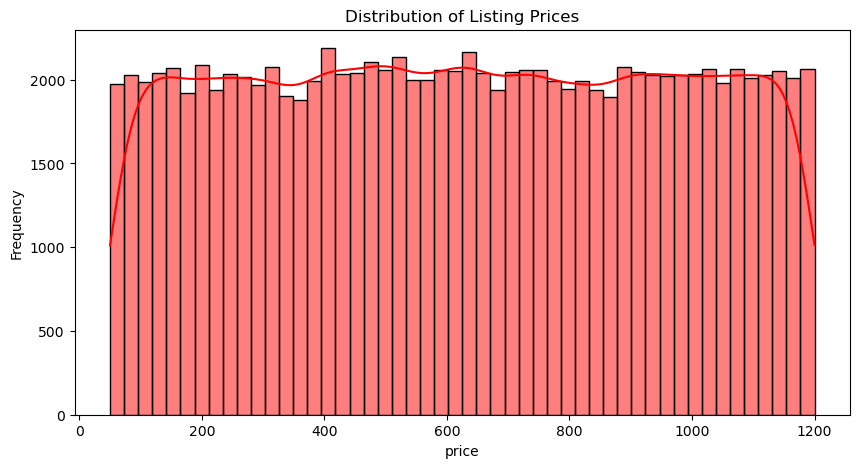

# Description 
- The histogram shows a fairly even distribution of
- listing prices across different price ranges, indicating no
- particular concentration of listings in any specific price range.
- The KDE line helps visualize this even spread more clearly,
- confirming that the dataset contains listings with a wide variety of prices.

# how are different room types distributed?

In [55]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365'],
      dtype='object')

In [101]:
df['room type']

0            Private room
1         Entire home/apt
2            Private room
4         Entire home/apt
5         Entire home/apt
               ...       
102053       Private room
102054       Private room
102055    Entire home/apt
102056       Private room
102057    Entire home/apt
Name: room type, Length: 101410, dtype: object

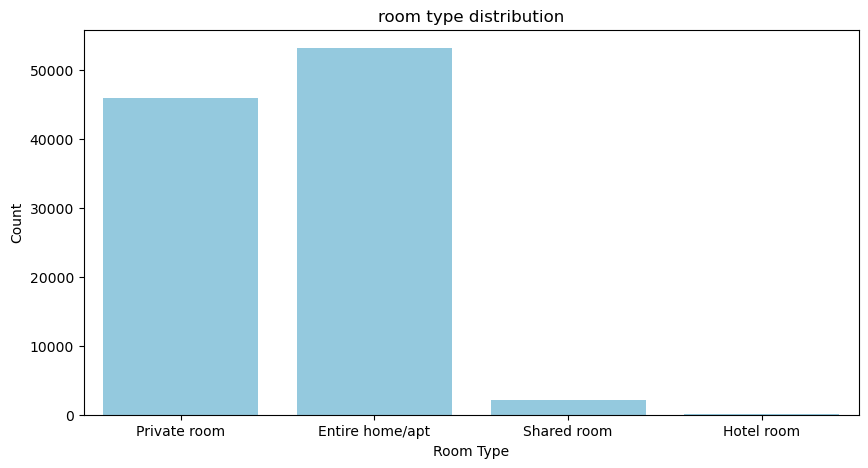

In [106]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'room type', data = df, color='skyblue')
plt.title('room type distribution')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

# How are listings distributed across different neighborhoods?

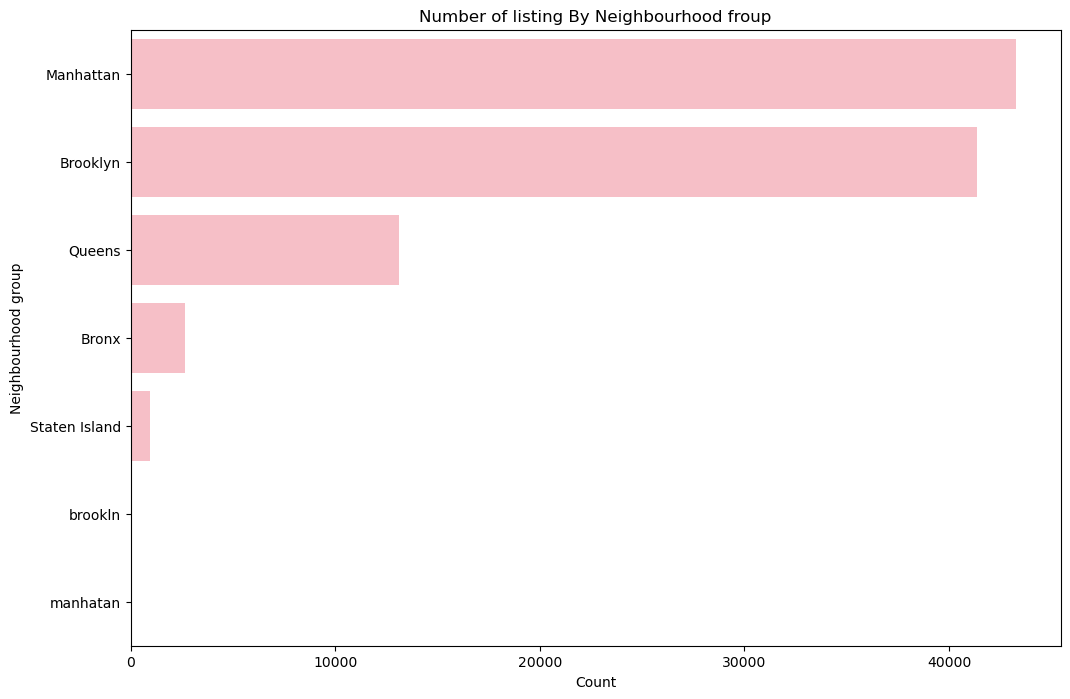

In [114]:
plt.figure(figsize=(12,8))
sns.countplot(y= 'neighbourhood group', data=df, color='lightpink', order=df['neighbourhood group'].value_counts().index)
plt.title('Number of listing By Neighbourhood froup')
plt.xlabel('Count')
plt.ylabel('Neighbourhood group')
plt.show()

# what is relationship Between price and room type ?

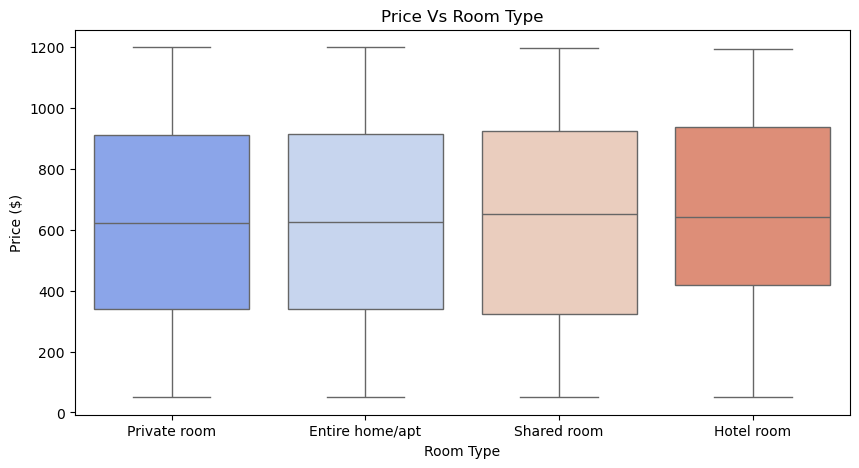

In [126]:
plt.figure(figsize=(10,5))

sns.boxplot(x='room type', y='price', hue='room type', data=df, palette='coolwarm')
plt.title('Price Vs Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price ($)')
plt.show()

# how has the number of reviews change over with time?

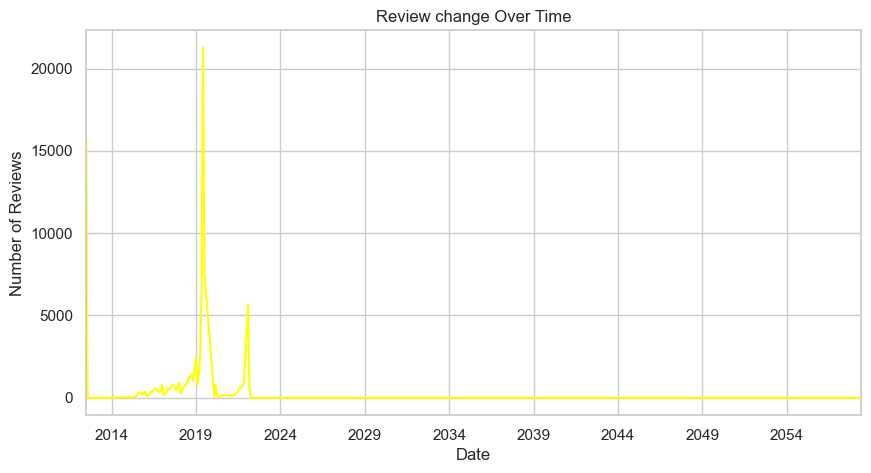

In [136]:
df['last review'] =  pd.to_datetime(df['last review'])
reviews_over_time = df.groupby(df['last review'].dt.to_period('M')).size()

plt.figure(figsize=(10,5))
reviews_over_time.plot(kind='line', color='yellow')
plt.title('Review change Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.show()